<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Sanofi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=fef25916d742e91304412e6362cc7d20f5c5ac4a1b5edf487e4b4ea1a3fffccf
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
SAN = "SAN" 

In [4]:
SAN = yfinance.download(SAN)

SAN

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-07-30,0.00,4.391340,4.319853,4.350490,-0.003867,5826200
1987-07-31,0.00,4.370915,4.319853,4.330065,-0.003849,2104000
1987-08-03,0.00,4.330065,4.309640,4.319853,-0.003839,965600
1987-08-04,0.00,4.319853,4.227941,4.227941,-0.003758,1479800
1987-08-05,0.00,4.217729,4.084967,4.105392,-0.003649,1068400
...,...,...,...,...,...,...
2020-09-21,1.92,1.940000,1.870000,1.920000,1.920000,24374300
2020-09-22,1.90,1.900000,1.820000,1.860000,1.860000,18104200
2020-09-23,1.87,1.880000,1.790000,1.790000,1.790000,16868200


In [5]:
SAN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-07-30,0.0,4.391340,4.319853,4.350490,-0.003867,5826200
1987-07-31,0.0,4.370915,4.319853,4.330065,-0.003849,2104000
1987-08-03,0.0,4.330065,4.309640,4.319853,-0.003839,965600
1987-08-04,0.0,4.319853,4.227941,4.227941,-0.003758,1479800
1987-08-05,0.0,4.217729,4.084967,4.105392,-0.003649,1068400


In [6]:
SAN.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,1.92,1.94,1.87,1.92,1.92,24374300
2020-09-22,1.90,1.90,1.82,1.86,1.86,18104200
2020-09-23,1.87,1.88,1.79,1.79,1.79,16868200
2020-09-24,1.80,1.85,1.78,1.82,1.82,13736200
2020-09-25,1.81,1.84,1.80,1.83,1.83,7172900


In [7]:
SAN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8358.000000,8358.000000,8358.000000,8358.000000,8358.000000,8.358000e+03
mean,7.840211,7.971368,7.813475,7.898315,3.349599,2.804419e+06
std,4.401151,4.376934,4.285234,4.334948,2.549807,4.717491e+06
min,0.000000,1.840000,1.780000,1.790000,-0.054312,0.000000e+00
25%,4.190000,4.227941,4.187091,4.210000,0.384234,1.369250e+05
50%,6.970000,7.060944,6.893383,6.987647,3.427135,3.826000e+05
75%,10.400000,10.539804,10.250000,10.430000,5.173665,4.452150e+06
max,22.200001,22.340000,21.969999,22.240000,9.598620,8.107490e+07


In [8]:
SAN.info

<bound method DataFrame.info of             Open      High       Low     Close  Adj Close    Volume
Date                                                               
1987-07-30  0.00  4.391340  4.319853  4.350490  -0.003867   5826200
1987-07-31  0.00  4.370915  4.319853  4.330065  -0.003849   2104000
1987-08-03  0.00  4.330065  4.309640  4.319853  -0.003839    965600
1987-08-04  0.00  4.319853  4.227941  4.227941  -0.003758   1479800
1987-08-05  0.00  4.217729  4.084967  4.105392  -0.003649   1068400
...          ...       ...       ...       ...        ...       ...
2020-09-21  1.92  1.940000  1.870000  1.920000   1.920000  24374300
2020-09-22  1.90  1.900000  1.820000  1.860000   1.860000  18104200
2020-09-23  1.87  1.880000  1.790000  1.790000   1.790000  16868200
2020-09-24  1.80  1.850000  1.780000  1.820000   1.820000  13736200
2020-09-25  1.81  1.840000  1.800000  1.830000   1.830000   7172900

[8358 rows x 6 columns]>

In [9]:
SAN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8358 entries, 1987-07-30 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8358 non-null   float64
 1   High       8358 non-null   float64
 2   Low        8358 non-null   float64
 3   Close      8358 non-null   float64
 4   Adj Close  8358 non-null   float64
 5   Volume     8358 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 457.1 KB


In [10]:
conn = sqlite3.connect("SAN.db")
c = conn.cursor()

In [11]:
conn = sqlite3.connect("SAN.db")
c = conn.cursor()

In [12]:
SAN.to_sql("SAN", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [13]:
#See data
c.execute("""SELECT * FROM SAN""")
rows = c.fetchall()
rows

[('1987-07-30 00:00:00',
  0.0,
  4.3913397789001465,
  4.319852828979492,
  4.350490093231201,
  -0.0038667223416268826,
  5826200),
 ('1987-07-31 00:00:00',
  0.0,
  4.370914936065674,
  4.319852828979492,
  4.3300652503967285,
  -0.00384856597520411,
  2104000),
 ('1987-08-03 00:00:00',
  0.0,
  4.3300652503967285,
  4.309640407562256,
  4.319852828979492,
  -0.0038394886068999767,
  965600),
 ('1987-08-04 00:00:00',
  0.0,
  4.319852828979492,
  4.227941036224365,
  4.227941036224365,
  -0.0037577964831143618,
  1479800),
 ('1987-08-05 00:00:00',
  0.0,
  4.217728614807129,
  4.084967136383057,
  4.105391979217529,
  -0.0036488771438598633,
  1068400),
 ('1987-08-06 00:00:00',
  0.0,
  4.217728614807129,
  4.115604400634766,
  4.207516193389893,
  -0.0037396459374576807,
  1429600),
 ('1987-08-07 00:00:00',
  0.0,
  4.227941036224365,
  4.166666507720947,
  4.166666507720947,
  -0.0037033383268862963,
  820000),
 ('1987-08-10 00:00:00',
  0.0,
  4.176878929138184,
  4.1462416648864

In [ ]:
SAN.to_excel("SAN.xls")

pd.read_excel("SAN.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.000000,0.223380,0.222222,0.223380,6.196926e-07,0
1,1962-01-03,0.000000,0.221065,0.219907,0.219907,6.100599e-07,345600
2,1962-01-04,0.000000,0.221065,0.217593,0.217593,6.036390e-07,216000
3,1962-01-05,0.000000,0.215856,0.214120,0.214120,5.940062e-07,129600
4,1962-01-08,0.000000,0.212384,0.210648,0.210648,5.843735e-07,172800
...,...,...,...,...,...,...,...
14781,2020-09-21,147.580002,147.929993,142.960007,145.100006,1.451000e+02,7574500
14782,2020-09-22,144.690002,145.350006,143.720001,144.210007,1.442100e+02,5295900
14783,2020-09-23,147.479996,147.550003,144.380005,144.440002,1.444400e+02,8784400
14784,2020-09-24,144.559998,145.250000,143.339996,144.669998,1.446700e+02,5614800


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


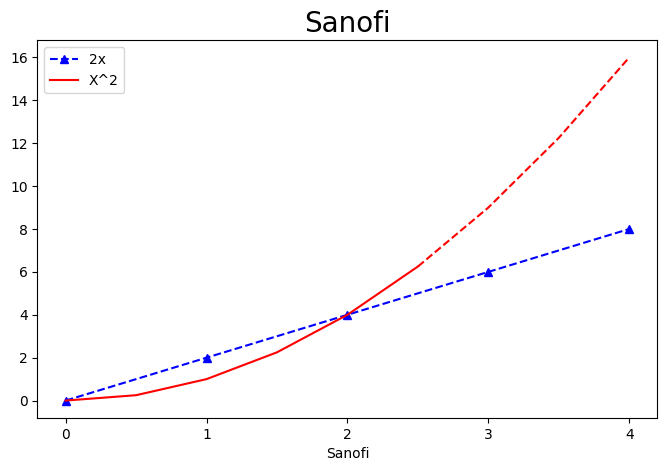

In [14]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Sanofi', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Sanofi')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

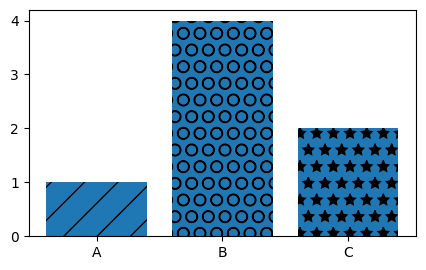

In [15]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()